# Домашнє завдання №9. Підбір гіперпараметрів

## Cтворення нейронної мережі за допомогою механізмів Keras, яка буде класифікувати товари із датасету fashion_mnist з точністю не менше 91%

### 1. Завантаження і підготовка даних

In [2]:
from tensorflow import keras


In [3]:
from keras.datasets import fashion_mnist
# датасет із зображеннями одягу та взуття, містить 60 000 тренувальних зображень і 10 000 тестових зображень розміром 28x28 пікселів, представляючи одяг у 10 різних класах

from keras.models import Sequential  # клас, який дозволяє створювати моделі шар за шаром

from keras.layers import Dense  # клас, який створює повнозв'язкові шари

from keras import utils  # утиліти для переведення даних в підходячий для keras формат

In [4]:
# Розпакування даних з load_data на тренувальні та тестові дані, а також відповідні мітки (labels)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
# Проаналізуємо форму тренувальних даних
print(x_train[0].shape)

(28, 28)


In [6]:
# Оскільки повнозв'язкова нейромережа не може працювати з двовимірним масивом,
# його необхідно переформатувати в одновимірний вектор

import numpy as np
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

In [7]:
x_train.shape

(60000, 784)

В датасеті fashion_mnist правильні відповіді містять номер класу зображення. Нейромережа видаватиме 10 значень (по кількості вихідних нейронів) з вирогідностями приналежності одягу до певного класу. Тому нам необхідно перетворити представлення правильних відповідей з номерів класів (від 0 до 9) у one-hot-encoding формат.

In [8]:
# Перетворимо мітки в категорії (one-hot-encoding)
y_train = utils.to_categorical(y_train, num_classes=10)

In [9]:
y_train.shape

(60000, 10)

### 2. Підбір гіперпараметрів для різних архітектур нейромережі

#### Модель №1

В якості першого варіанту побудуємо повнозв'язкову (всі нейрони одного шару пов'язані зі всіма нейронами наступного шуру) нейромережу з двох шарів:
- вхідний шар з 800 нейронів;
- вихідний шар з 10 нейронів.

Кількість нейронів на вхідному шарі можна міняти, але кількість нейронів виходного шару має дорівнювати кількості міток.

Кожний вихідний нейрон видаватиме вирогідність (від 0 до 1) конкретного предмету одягу.

In [11]:
# створюємо послідовну модель
model1 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model1.add(Dense(800, input_dim=784, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model1.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [12]:
# виведемо параметри моделі
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [17]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model1.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 6s 24ms/step - loss: 0.2438 - accuracy: 0.9157 - val_loss: 0.2386 - val_accuracy: 0.9191
Epoch 2/100
250/250 [==============================] - 4s 17ms/step - loss: 0.2428 - accuracy: 0.9162 - val_loss: 0.2432 - val_accuracy: 0.9154
Epoch 3/100
250/250 [==============================] - 5s 21ms/step - loss: 0.2424 - accuracy: 0.9163 - val_loss: 0.2380 - val_accuracy: 0.9179
Epoch 4/100
250/250 [==============================] - 6s 25ms/step - loss: 0.2420 - accuracy: 0.9164 - val_loss: 0.2389 - val_accuracy: 0.9177
Epoch 5/100
250/250 [==============================] - 4s 16ms/step - loss: 0.2411 - accuracy: 0.9168 - val_loss: 0.2389 - val_accuracy: 0.9179
Epoch 6/100
250/250 [==============================] - 4s 16ms/step - loss: 0.2407 - accuracy: 0.9165 - val_loss: 0.2414 - val_accuracy: 0.9173
Epoch 7/100
250/250 [==============================] - 6s 23ms/step - loss: 0.2407 - accuracy: 0.9169 - val_loss: 0.2454 - val_accuracy:

In [18]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


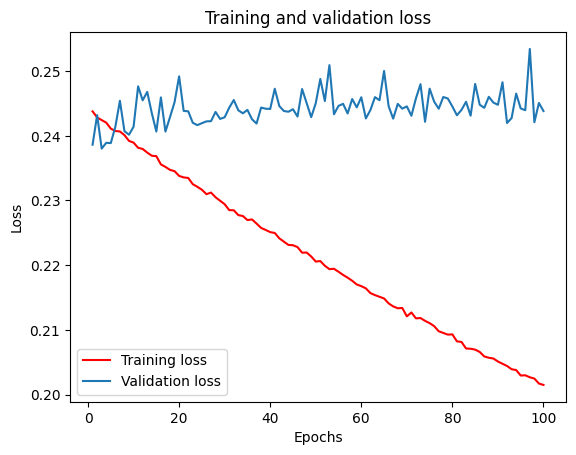

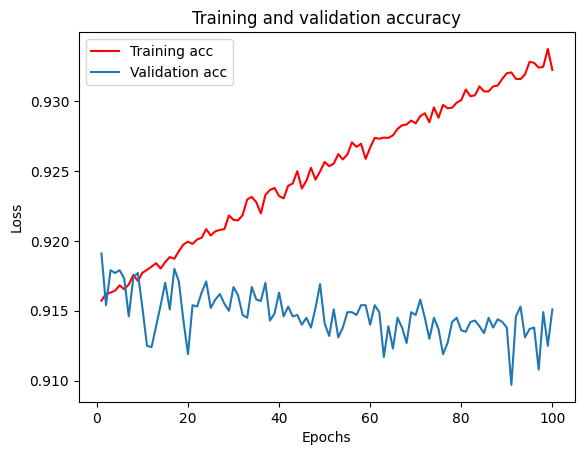

In [22]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, label='Training loss', color="r")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Оцінювання якості роботи нейромережі.


Бачимо, що для моделі №1 в процесі навчання на тренувальному наборі ф-я втрат спадає, а точність зростає - це, наче, добре. Але на валідаційному наборі навпаки, ф-я втрат зростає, а точність падає. Маємо перенавчання. Модель можна покращити.

#### Модель №2

В другому варіанті додамо до нейромережі ще один шар з 784 нейронів (буде вхідним шаром).


In [10]:
# створюємо послідовну модель
model2 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model2.add(Dense(784, input_dim=784, activation='relu'))
model2.add(Dense(800, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model2.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [11]:
# виведемо параметри моделі
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 800)               628000    
                                                                 
 dense_2 (Dense)             (None, 10)                8010      
                                                                 
Total params: 1251450 (4.77 MB)
Trainable params: 1251450 (4.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [12]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model2.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 11s 42ms/step - loss: 1.1704 - accuracy: 0.6683 - val_loss: 0.7924 - val_accuracy: 0.7611
Epoch 2/100
250/250 [==============================] - 8s 31ms/step - loss: 0.7074 - accuracy: 0.7778 - val_loss: 0.6454 - val_accuracy: 0.7921
Epoch 3/100
250/250 [==============================] - 10s 40ms/step - loss: 0.6081 - accuracy: 0.8058 - val_loss: 0.5851 - val_accuracy: 0.8099
Epoch 4/100
250/250 [==============================] - 9s 37ms/step - loss: 0.5566 - accuracy: 0.8185 - val_loss: 0.5438 - val_accuracy: 0.8197
Epoch 5/100
250/250 [==============================] - 8s 32ms/step - loss: 0.5248 - accuracy: 0.8264 - val_loss: 0.5134 - val_accuracy: 0.8282
Epoch 6/100
250/250 [==============================] - 11s 45ms/step - loss: 0.5022 - accuracy: 0.8315 - val_loss: 0.4969 - val_accuracy: 0.8323
Epoch 7/100
250/250 [==============================] - 9s 35ms/step - loss: 0.4845 - accuracy: 0.8351 - val_loss: 0.4840 - val_accura

In [ ]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


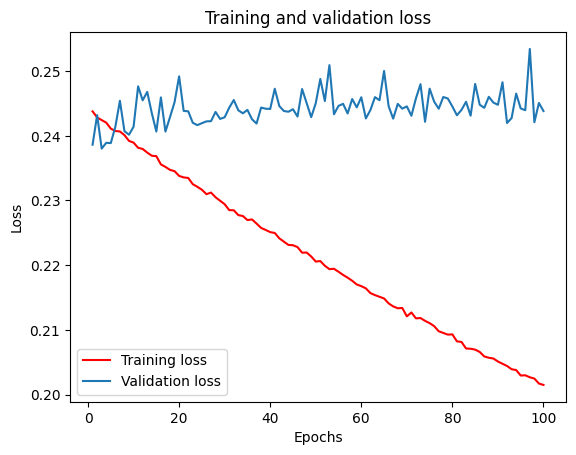

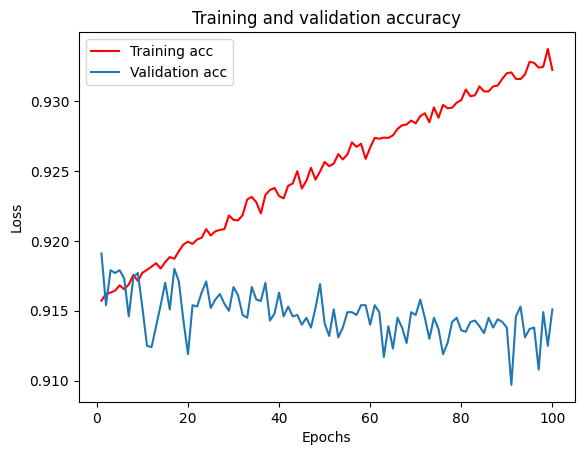

In [ ]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, label='Training loss', color="r")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №2 складніша за модель №1 (додано шар), при цьому токож маємо перенавчання. Таким чином додавання шару нейронів не покращило ефективність моделі. В моделі №3 будемо знов відштовхуватися від моделі №1.

#### Модель №3

В третьому варіанті знов беремо за основу модель №1. Спробуємо спростити модель, зменшимо кількість нейронів на вхідному шарі до 50.


In [28]:
# створюємо послідовну модель
model3 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model3.add(Dense(50, input_dim=784, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model3.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model3.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [29]:
# виведемо параметри моделі
print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [30]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model3.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 1.3571 - accuracy: 0.6043 - val_loss: 0.9264 - val_accuracy: 0.7142
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.8246 - accuracy: 0.7362 - val_loss: 0.7483 - val_accuracy: 0.7602
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.7095 - accuracy: 0.7697 - val_loss: 0.6733 - val_accuracy: 0.7844
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6505 - accuracy: 0.7871 - val_loss: 0.6295 - val_accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6126 - accuracy: 0.7985 - val_loss: 0.6010 - val_accuracy: 0.8023
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5855 - accuracy: 0.8063 - val_loss: 0.5770 - val_accuracy: 0.8084
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5648 - accuracy: 0.8131 - val_loss: 0.5595 - val_accuracy: 0.8149

In [31]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


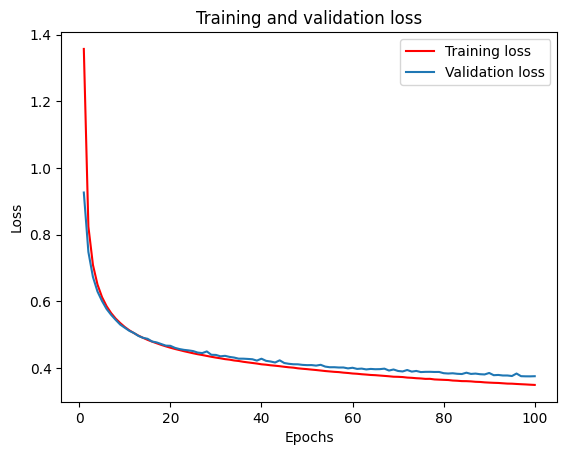

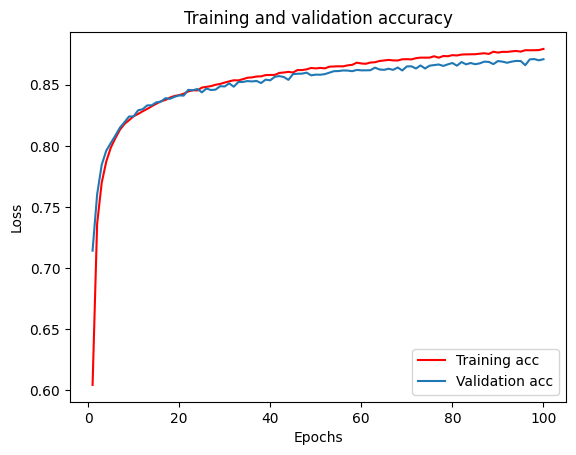

In [32]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, label='Training loss', color="r")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №3 простіша за модель №1, при цьому перенавчання відсутнє. Однак точність недостатня. В моделі №4 вже будемо відштовхуватися від моделі №3.